
# Introduction to Classification

* Classification techniques are an essential part of machine learning and data mining applications.

* Approximately 70% of problems in Data Science are classification problems. 


* In solving most of these problems, a go to algorithm is the logistic regression model.

* It is useful in solving binary class problems.

In this practical session, we will train a binary class problem using 
**logistic regression**.

* Logistic regression is useful for various classification problems including spam detection, diabetes prediction, churning of customers etc

By the end of this lab, you will be able to:

* understand difference between linear regression and logistic regression

* how logistic regression works?

* train a logisitc regression model in Scikit-learn
 
* evaluate a logistic regression model


* outline the advantages and disadvantages of Logistic Regression


## Note:


* Logistic regression is a type of a classification algorithm in which the outcome is binary/discrete.

* Logistic regression is a special case of linear regression where the 
target variable is categorical in nature. 

* As such, Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.


Given a dataset $D=\{X_{i},y_{i}\}^{n}_{i=1}$  as inputs with output class $y \in \{0,1\}$. We would define our hypothesis $h_0$ as:
$$\dfrac{1}{1+ e^{-\theta ^{T}X}} \hspace{0.2in} \text{where} \hspace{0.2in} \dfrac{1}{1+ e^{-z}} \hspace{0.2in} \text{is sigmoid function}$$ 


### Objective:

We would be training a logistic regression model using a [dataset](https://zindi.africa/hackathons/umojahack-ghana-expresso-churn-prediction-challenge) from  Zindi on churn predictions.

In [ ]:
import pandas as pd
df = pd.read_csv('Train .csv')
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [ ]:
description = pd.read_csv("VariableDefinitions.csv")
description.head()

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network


In [ ]:
print("data cols are:",df.columns)

data cols are: Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')


In [ ]:
df.CHURN.value_counts()

0    1750062
1     403986
Name: CHURN, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


Text(0.5, 0, 'REGION')

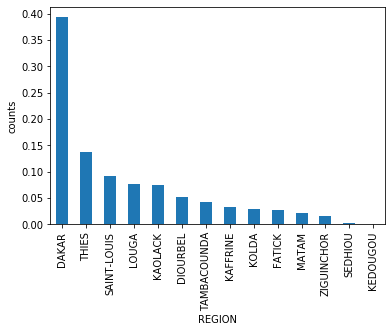

In [ ]:
import matplotlib.pyplot as plt
df['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

Text(0.5, 0, 'TENURE')

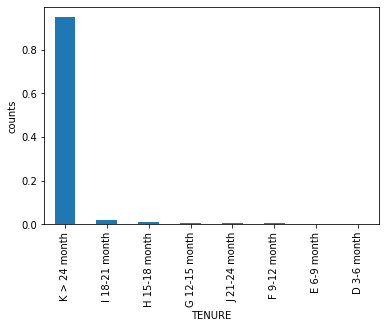

In [ ]:
df['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

For the purposes of this lab, I will want to select a few columns to work with for now.


**Disclaimer:** Before dropping out columns in any future project, you should have an explanation as to why that column is not important to your model training.

In [ ]:
df = df[['REGION',  'REVENUE','DATA_VOLUME', 'ON_NET', 'CHURN']]

In [ ]:
print("The number of missing values in the data is:", df.isnull().sum().sum())

The number of missing values in the data is: 3422455


In [ ]:
print("Names of cols with missing values:", df.isnull().sum())

Names of cols with missing values: REGION          849299
REVENUE         726048
DATA_VOLUME    1060433
ON_NET          786675
CHURN                0
dtype: int64



### Preprocessing Data 

Next step is to preprocess the data for training.

First, we realize the data has so many missing values and as such we would need to handle them. We have different ways in handling missing values and it also depends on the data type.
Additionally, we need to change all categorical columns to numerical and then we would scale the numerical columns too. 

In [ ]:
df['REGION'].fillna(df['REGION'].value_counts().index[0], inplace=True)
df['DATA_VOLUME'].fillna((df['DATA_VOLUME'].mean()), inplace=True)
df['ON_NET'].fillna((df['ON_NET'].mean()), inplace=True)
df['REVENUE'].fillna((df['REVENUE'].mean()), inplace=True)


In [ ]:
df.corr()

,REVENUE,DATA_VOLUME,ON_NET,CHURN
REVENUE,1.000000,0.239594,0.321036,-0.053808
DATA_VOLUME,0.239594,1.000000,-0.006394,-0.015398
ON_NET,0.321036,-0.006394,1.000000,-0.026601
CHURN,-0.053808,-0.015398,-0.026601,1.000000


## Machine Learning


Select the columns for X and y

In [ ]:
dropcols = [ 'CHURN']
y = df['CHURN']
X = df.drop(columns=dropcols, axis=1)

Split data into train and test. 

## Why is this important?

In [ ]:

from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)


(1723238, 4) (1723238,) (430810, 4) (430810,)


In [ ]:
num_cols = ['REVENUE','DATA_VOLUME', 'ON_NET']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])[num_cols] 

/home/kanubala/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kanubala/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/home/kanubala/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tu

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X_train["REGION"] = encoder.fit_transform(X_train["REGION"])

X_test["REGION"] = encoder.transform(X_test["REGION"])


/home/kanubala/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kanubala/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Model Training

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
model = LogisticRegression()


In [ ]:
# fit the model with data
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:

# predict xtest
y_pred=model.predict(X_test)

### Model Evaluation using Confusion Matrix

We can evaluate our model using any of the following:

 

**Confusion matrix**
This lays out correctly and incorrectly classified cases
For the binary (two-class) case the confusion matrix is organized as follows:

| | Scored Positive | Scored Negative|  
|------|:------:|:------:| 
|**Actual Positive** | True Positive | False Negative |
|**Actual Negative**| False Positive | True Negative |   

Here the four elements in the matrix are defined as:    
**True Positive** or **TP** are cases with positive labels which have been correctly classified as positive.     
**True Negative** or **TN** are cases with negative labels which have been correctly classified as negative.  
**False Positive** or **FP** are cases with negative labels which have been incorrectly classified as positive.   
**False Negative** or **FN** are cases with positive labels which have been incorrectly classified as negative.
 

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[349780,    318],
       [ 80633,     79]])

**Accuracy**

Accuracy is the fraction of cases correctly classified  over the total number of classifications. For a two-class classifier accuracy is written as:

$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8120958195027971


### Note:

There are other evaluation metric such as:

* F1 score
* Recall
* Precision
* ROC

#### Advantages of Logisitic Regression

* Easy to implement
* Easily interpretable
* Provides probability scores
* Does not require high computational power


### Disadvantages

* Unable to handle handle a large number of categorical features/variables hence, it is vulnerable to overfitting.

* Non-linear problems cannot be solved with logistic regression

* Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

#### Conclusion

In this pratical session, we were able covered:

* details about logistic regression

* encoding categorical features

* scaling numerical features

* evaluating logisitc regression model


Hopefully, you can now utilize the Logistic Regression technique to analyze your Zindi project. Feel free to explore other complex models for that project.


# I wish you all the best of luck !!!